Comments on vocabulary
 dataset containts images of 28x28 grayscale pixels = 784 total pixels called features
 Each feature represents intensity from 0 to 255 (black)
 There are 24 classes - differnt signs

In [1]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.19.1.


In [2]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("\nTraining data array shape:signs_t ",signs_train.shape)
#print("Training data length: ",len(signs_train.index))
print("\n")
file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("\nTesting data array shape:signs_t ",signs_test.shape)
#print("Testing data length: ",len(signs_test.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB

Training data array shape:signs_t  (27455, 785)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB

Testing data array shape:signs_t  (7172, 785)


In [3]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)


In [4]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

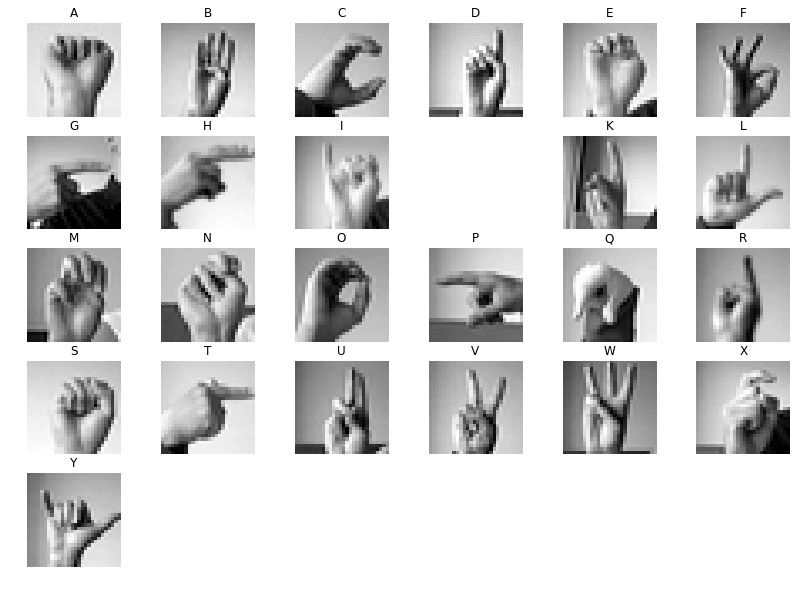

In [5]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    if index == 0:
        SIGN_A = signIndex
    #print(index, signIndex)
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

# SVM - SUPPORT VECTOR MACHINE

In [6]:
# SVM
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])
svm_clf.fit(X_train, y_train)

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [7]:
print("Linear SVC with Standard Scaler testing classifier accuracy...")
svm_clf.score(X_test, y_test,sample_weight=None)

Linear SVC with Standard Scaler testing classifier accuracy...


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.55758505298382599

In [8]:
print("the Sign index is ", y_test[2])
svm_clf.predict([X_test[2]])

the Sign index is  10


array([10])

In [10]:
svm_clf.decision_function([X_test[2]])

array([[-1.72158869, -5.23587242, -3.13008776, -1.74231169, -3.83093849,
        -2.68542757, -0.74197703, -2.30599551, -6.07335914,  1.14078098,
        -3.97267014, -5.81485698, -3.81284317, -4.36783043, -1.42151443,
        -3.64710509, -2.5687045 , -7.62060267, -3.97905447, -3.71229136,
        -3.70267699, -2.39303072, -3.68615803, -0.36714038]])

In [11]:
# confusion matric computation returning predictions made on each test fold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3, n_jobs=1)
#confusion_matrix(y_train, y_train_pred)


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# Precision of the classifier =  TP/(TP + FP)
# Recall (sensitivity) = TP/(TP+FN)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average='micro'  )

0.99996357676197412

In [13]:
recall_score(y_train, y_train_pred, average='micro')

0.99996357676197412

In [25]:
#Combining precision and recall into once metric - F1 score (harmonic mean)
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average='macro')

0.99996159714262911

In [15]:
#cross-validation using K-fold with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X_train, y_train, cv=3,scoring="accuracy")


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 0.99989085,  1.        ,  1.        ])

# ERROR ANALYSIS

In [16]:
#calculaing confusion matrix for SVM

conf_mx = confusion_matrix(y_train, y_train_pred)

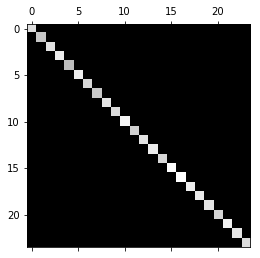

In [17]:
# plotting confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [18]:
#comparing error rates rather than absolute number of erors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

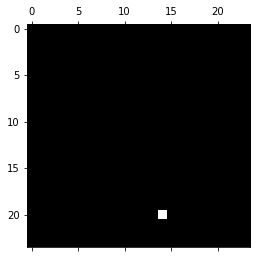

In [19]:
np.fill_diagonal(norm_conf_mx, 0)
#plt.figure(figsize=(10, 10))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# rows represent actual classes
# columns represent predicted classes
# bright columsn show that 17 and 18 are often misclassified

# Testing with Test Data Set

In [27]:
y_test_score = svm_clf.decision_function(X_test)
print(y_test_score)

[[-4.20413296 -4.38316311 -1.17960978 ..., -2.20471227 -2.29460568
  -3.20566627]
 [-1.70773239 -1.20839552 -2.30638953 ..., -4.82232477 -3.37224002
  -3.13631056]
 [-1.72158869 -5.23587242 -3.13008776 ..., -2.39303072 -3.68615803
  -0.36714038]
 ..., 
 [-2.42887941 -0.08702688  0.67980111 ..., -2.04646965 -1.40807498
  -1.23805801]
 [-2.7438358  -0.41173341 -0.88352598 ..., -4.58129578 -5.13951087
  -4.12266413]
 [-2.70669961  0.23576063  0.80217141 ..., -2.412296   -1.33019918
  -0.83400968]]


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# # For each class
# precision = dict()
# recall = dict()
# average_precision = dict()
# for i in range(26):
#     precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
#                                                         y_test_score[:, i])
#     average_precision[i] = average_precision_score(y_test[:, i], y_test_score[:, i])

# # A "micro-average": quantifying score on all classes jointly
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
#     y_test_score.ravel())
# average_precision["micro"] = average_precision_score(y_test, y_test_score,
#                                                      average="micro")
# print('Average precision score, micro-averaged over all classes: {0:0.2f}'
#       .format(average_precision["micro"]))


In [29]:
svm_clf.score(X_test, y_test,sample_weight=None)
#precision_score(y_test, y_test_score, average='micro'  )

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.55563301728945902

In [31]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred))

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline 0.555633017289


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.27586020138, gamma=0.0442793087551 ..........................


ValueError: Invalid parameter C for estimator Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))]). Check the list of available parameters with `estimator.get_params().keys()`.